In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import keras
from keras.models import Model
from keras.layers import Input,Dense
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
np.random.seed(7)

In [4]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

X_train = np.divide(X_train,255.).reshape((len(X_train),28*28))
X_test = np.divide(X_test,255.).reshape((len(X_test),28*28))

y_temp = list()
for i in range(y_train.shape[0]):
    temp = np.zeros((10,))
    temp[y_train[i]] = 1.
    y_temp.append(temp)
y_train = np.array(y_temp)

y_temp = list()
for i in range(y_test.shape[0]):
    temp = np.zeros((10,))
    temp[y_test[i]] = 1.
    y_temp.append(temp)
y_test = np.array(y_temp)

del y_temp

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [5]:
input_vector = Input(shape=(784,))
print('input_vector', input_vector.shape)

attention_probs = Dense(784, activation='softmax')(input_vector)
print('\nattention_probs',attention_probs.shape)
attention_mul = keras.layers.multiply([input_vector, attention_probs])
print('attention_mul',attention_mul.shape)

dense = Dense(512,activation='relu')(attention_mul)
dense = Dense(512,activation='relu')(dense)

output_class = Dense(10, activation='softmax')(dense)
print('\noutput_class',output_class.shape)

input_vector (?, 784)

attention_probs (?, 784)
attention_mul (?, 784)

output_class (?, 10)


In [6]:
model = Model(input_vector,output_class)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 784)          615440      input_1[0][0]                    
__________________________________________________________________________________________________
multiply_1 (Multiply)           (None, 784)          0           input_1[0][0]                    
                                                                 dense_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 512)          401920      multiply_1[0][0]                 
__________

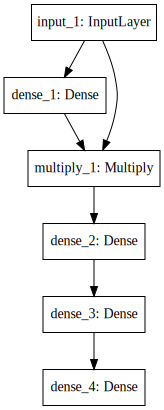

In [7]:
print(model.summary())
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [8]:
history = model.fit(X_train,y_train,batch_size=1024,epochs=100,verbose=1,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 4s 81us/step - loss: 1.9199 - acc: 0.3802 - val_loss: 0.7850 - val_acc: 0.7988
Epoch 2/100
54000/54000 [==============================] - 1s 11us/step - loss: 0.4740 - acc: 0.8573 - val_loss: 0.2455 - val_acc: 0.9290
Epoch 3/100
54000/54000 [==============================] - 1s 11us/step - loss: 0.2488 - acc: 0.9265 - val_loss: 0.1730 - val_acc: 0.9522
Epoch 4/100
54000/54000 [==============================] - 1s 11us/step - loss: 0.1802 - acc: 0.9476 - val_loss: 0.1437 - val_acc: 0.9592
Epoch 5/100
54000/54000 [==============================] - 1s 11us/step - loss: 0.1444 - acc: 0.9576 - val_loss: 0.1296 - val_acc: 0.9633
Epoch 6/100
54000/54000 [==============================] - 1s 12us/step - loss: 0.1203 - acc: 0.9646 - val_loss: 0.1154 - val_acc: 0.9660
Epoch 7/100
54000/54000 [==============================] - 1s 11us/step - loss: 0.1007 - acc: 0.9702 - val_loss: 0.1114 - v

54000/54000 [==============================] - 1s 11us/step - loss: 4.2495e-04 - acc: 1.0000 - val_loss: 0.1993 - val_acc: 0.9725
Epoch 60/100
54000/54000 [==============================] - 1s 11us/step - loss: 4.1837e-04 - acc: 1.0000 - val_loss: 0.2006 - val_acc: 0.9720
Epoch 61/100
54000/54000 [==============================] - 1s 11us/step - loss: 4.1138e-04 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9722
Epoch 62/100
54000/54000 [==============================] - 1s 11us/step - loss: 4.0523e-04 - acc: 1.0000 - val_loss: 0.2024 - val_acc: 0.9720
Epoch 63/100
54000/54000 [==============================] - 1s 11us/step - loss: 4.0001e-04 - acc: 1.0000 - val_loss: 0.2038 - val_acc: 0.9720
Epoch 64/100
54000/54000 [==============================] - 1s 11us/step - loss: 3.9491e-04 - acc: 1.0000 - val_loss: 0.2040 - val_acc: 0.9722
Epoch 65/100
54000/54000 [==============================] - 1s 11us/step - loss: 3.8978e-04 - acc: 1.0000 - val_loss: 0.2041 - val_acc: 0.9723
Epoch 66/100

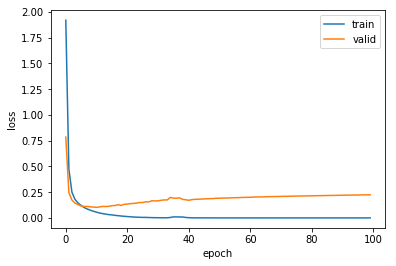

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'])
plt.show()

In [10]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(10000, 10)


In [11]:
print('acc')
acc = 0
for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
        acc += 1
        
print(acc / len(y_pred))

acc
0.9695


In [12]:
attention_model = Model(input_vector, attention_probs)

In [13]:
y_att = attention_model.predict(X_test)

7 7


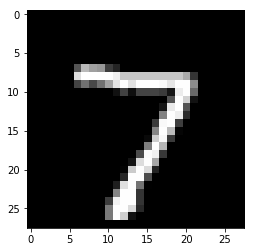

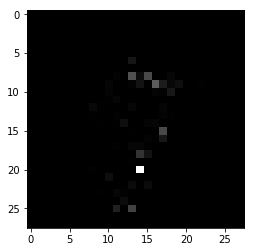

2 2


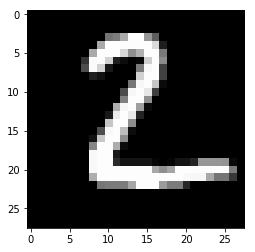

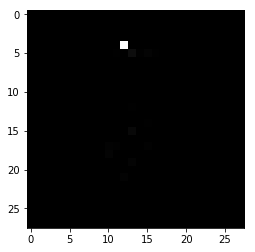

1 1


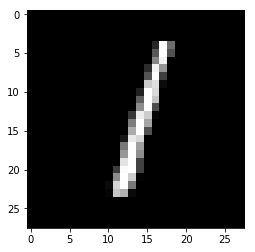

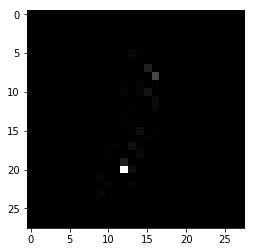

0 0


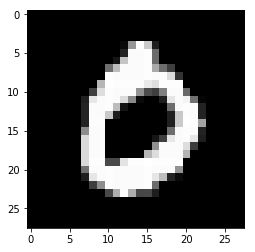

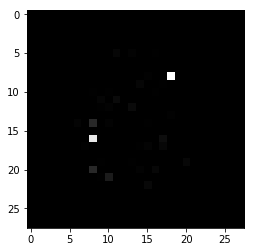

4 4


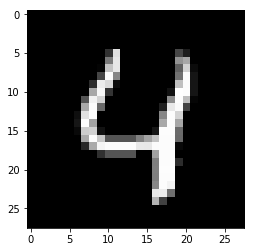

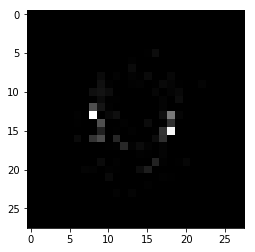

1 1


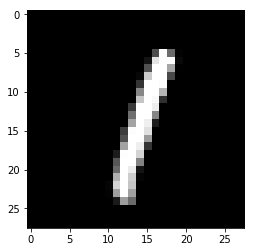

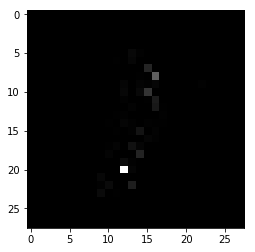

4 4


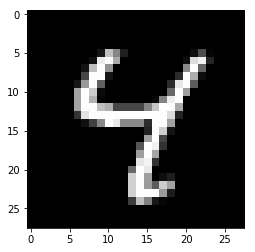

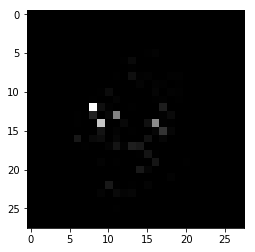

9 9


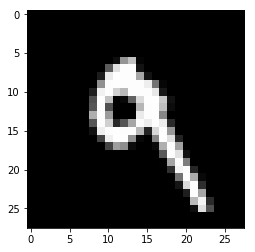

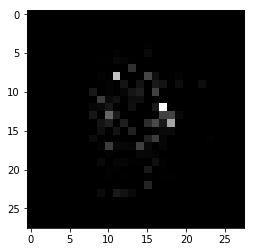

8 5


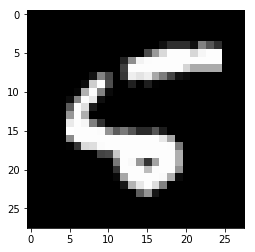

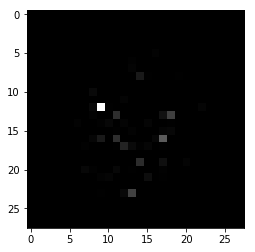

9 9


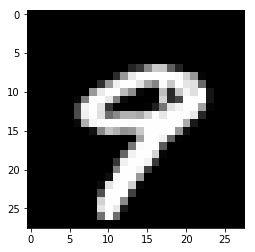

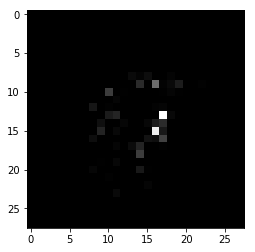

In [14]:
for i in range(10):
    print(np.argmax(y_pred[i]), np.argmax(y_test[i]))
    plt.imshow(X_test[i].reshape((28,28)), interpolation='nearest',cmap='gray')
    plt.show()

    plt.imshow(y_att[i].reshape((28,28)),cmap='gray')
    plt.show()